In [176]:
import importlib
import numpy as np
import hopfieldNetwork as hn
import matplotlib.pyplot as plt

## 3.1 Convergence and Attractors

In [177]:
N = 8
log2N = int(np.log2(N))
x1 = np.array([-1, -1, 1, -1, 1, -1, -1, 1])
x2 = np.array([-1, -1, -1, -1, -1, 1, -1, -1])
x3 = np.array([-1, 1, 1, -1, -1, 1, -1, 1])

patterns= np.array([x1, x2, x3])

In [178]:
importlib.reload(hn)
hop_net1 = hn.HopfieldNetwork(patterns)
hop_net1.check_storage()

Fixed Point found after 2 iterations!
Convergence towards stored pattern nb 0!
[-1 -1  1 -1  1 -1 -1  1] 

Fixed Point found after 2 iterations!
Convergence towards stored pattern nb 1!
[-1 -1 -1 -1 -1  1 -1 -1] 

Fixed Point found after 2 iterations!
Convergence towards stored pattern nb 2!
[-1  1  1 -1 -1  1 -1  1] 



In [179]:
x1d = np.array([1, -1, 1, -1, 1, -1, -1, 1])
x2d = np.array([1, 1, -1, -1, -1, 1, -1, -1])
x3d = np.array([1, 1, 1, -1, 1, 1, -1, 1])

destroyed_patterns = np.array([x1d, x2d, x3d])

In [181]:
importlib.reload(hn)
hop_net1 = hn.HopfieldNetwork(patterns)
for p in destroyed_patterns:
    inter_patterns, _, _ = hop_net1.update_rule(p, max_iter=log2N)
    # for i, ip in enumerate(reversed(inter_patterns)):
    #     print(i, ip)

Fixed Point found after 2 iterations!
Convergence towards stored pattern nb 0!
[-1 -1  1 -1  1 -1 -1  1] 

Fixed Point found after 2 iterations!
Convergence towards stored pattern nb 1!
[-1 -1 -1 -1 -1  1 -1 -1] 

Fixed Point found after 2 iterations!
Convergence towards stored pattern nb 2!
[-1  1  1 -1 -1  1 -1  1] 



In [182]:
importlib.reload(hn)
hop_net1 = hn.HopfieldNetwork(patterns)
attractors = hop_net1.find_attractors()
attractors.shape

(163, 8)

In [184]:
x3dd = np.array([1, -1, -1, 1, 1, 1, -1, 1])
inter_patterns, _, _ = hop_net1.update_rule(x3dd, max_iter=log2N)

Fixed Point found after 2 iterations!
This pattern is an attractor!
[ 1 -1 -1  1  1 -1  1 -1] 



## 3.2 Sequential Update

In [199]:
N2 = 1024
log2N2 = int(np.log2(N2))
pictures_patterns = np.loadtxt('pict.dat', delimiter=',')
pictures_patterns = pictures_patterns.reshape((11, 1024))
pictures_patterns.shape

(11, 1024)

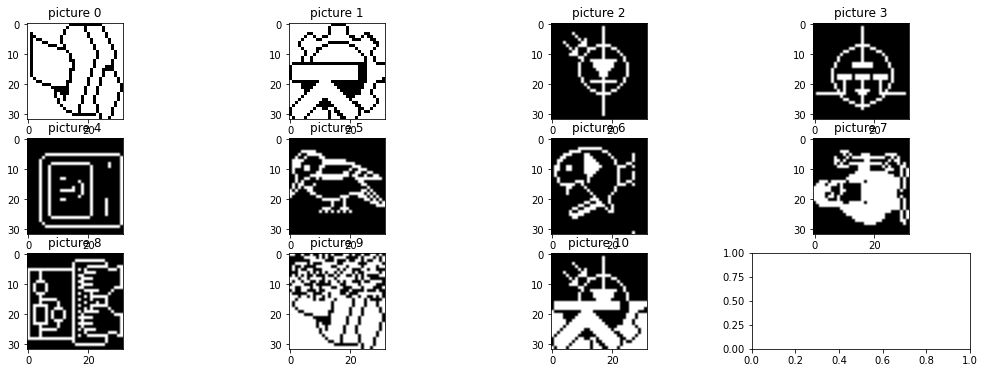

In [200]:
pictures = pictures_patterns.reshape((11, 32, 32))
fig, ax = plt.subplots(3, 4, figsize=(18,6))
for i, pic in enumerate(pictures):
    ax[i//4, i%4].imshow(pic, cmap="binary")
    ax[i//4, i%4].set_title(f"picture {i}")

In [201]:
importlib.reload(hn)
hop_net2 = hn.HopfieldNetwork(pictures_patterns[:3,:])
hop_net2.check_storage()

Fixed Point found after 9 iterations!
Convergence towards stored pattern nb 0!
[-1. -1. -1. ... -1. -1. -1.] 

Fixed Point found after 9 iterations!
Convergence towards stored pattern nb 1!
[-1. -1. -1. ... -1. -1. -1.] 

Fixed Point found after 9 iterations!
Convergence towards stored pattern nb 2!
[1. 1. 1. ... 1. 1. 1.] 



In [202]:
inter, patt, _ = hop_net2.update_rule(pictures_patterns[9], log2N2)
# for i, ip in enumerate(reversed(inter)):
#     print(i, ip)

Fixed Point found after 9 iterations!
Convergence towards stored pattern nb 0!
[-1. -1. -1. ... -1. -1. -1.] 



In [203]:
inter, patt, _ = hop_net2.update_rule(pictures_patterns[10], log2N2)

Fixed Point found after 9 iterations!
This pattern is an attractor!
[1. 1. 1. ... 1. 1. 1.] 



In [210]:
inter, patt, _ = hop_net2.update_rule(pictures_patterns[9], 8000, sync=False)

Fixed Point found after 7999 iterations!
Convergence towards stored pattern nb 0!
[-1. -1. -1. ... -1. -1. -1.] 



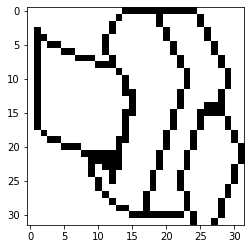

In [211]:
for i, ip in enumerate(reversed(inter)):
    if i%500==0: 
        plt.imshow(ip.reshape((32,32)), cmap="binary")

In [212]:
inter.shape

(8000, 1024)

## 3.3 Energy

In [220]:
importlib.reload(hn)
hop_net2 = hn.HopfieldNetwork(pictures_patterns[:3,:])
for i, s in enumerate(hop_net2.states):
    print(i, hop_net2.energy(s))

0 -1473936.0
1 -1398416.0
2 -1497344.0


In [221]:
hop_net2.energy(pictures_patterns[9])

-1473936.0

In [222]:
hop_net2.energy(pictures_patterns[10])

-177664.0

Fixed Point found after 8999 iterations!
Convergence towards stored pattern nb 0!
[-1. -1. -1. ... -1. -1. -1.] 



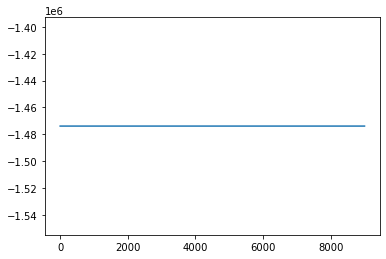

In [224]:
_, _, energy = hop_net2.update_rule(pictures_patterns[9], 9000, sync=False)
plt.plot(range(9000), energy)